In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load data from Sheet 2
df = pd.read_excel("master_file.xlsx", sheet_name=1)


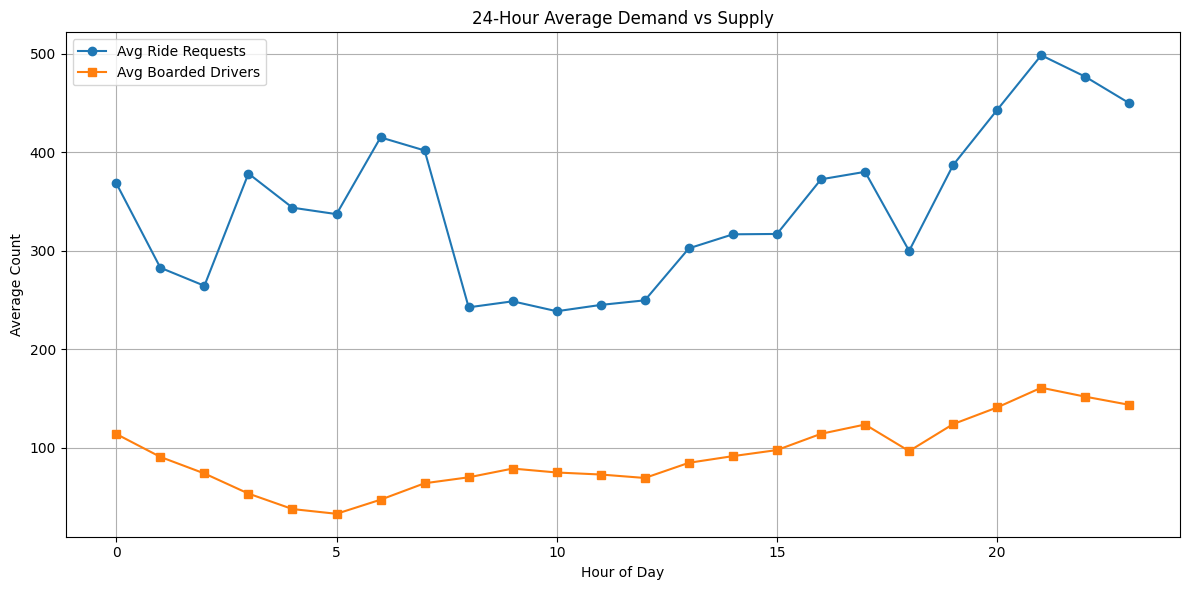

In [4]:

# Create columns
df['DayOfWeek'] = pd.to_datetime(df['OnlyDate']).dt.day_name()
df['Week'] = df['week']  # reuse existing week number
df['Undersupplied'] = df['RidesRequests'] > df['TotalBoardedDrivers']


hourly_avg = df.groupby('Hour').agg({
    'RidesRequests': 'mean',
    'TotalBoardedDrivers': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg['Hour'], hourly_avg['RidesRequests'], label='Avg Ride Requests', marker='o')
plt.plot(hourly_avg['Hour'], hourly_avg['TotalBoardedDrivers'], label='Avg Boarded Drivers', marker='s')
plt.title('24-Hour Average Demand vs Supply')
plt.xlabel('Hour of Day')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("hourly_curve_sheet2.png")
plt.show()



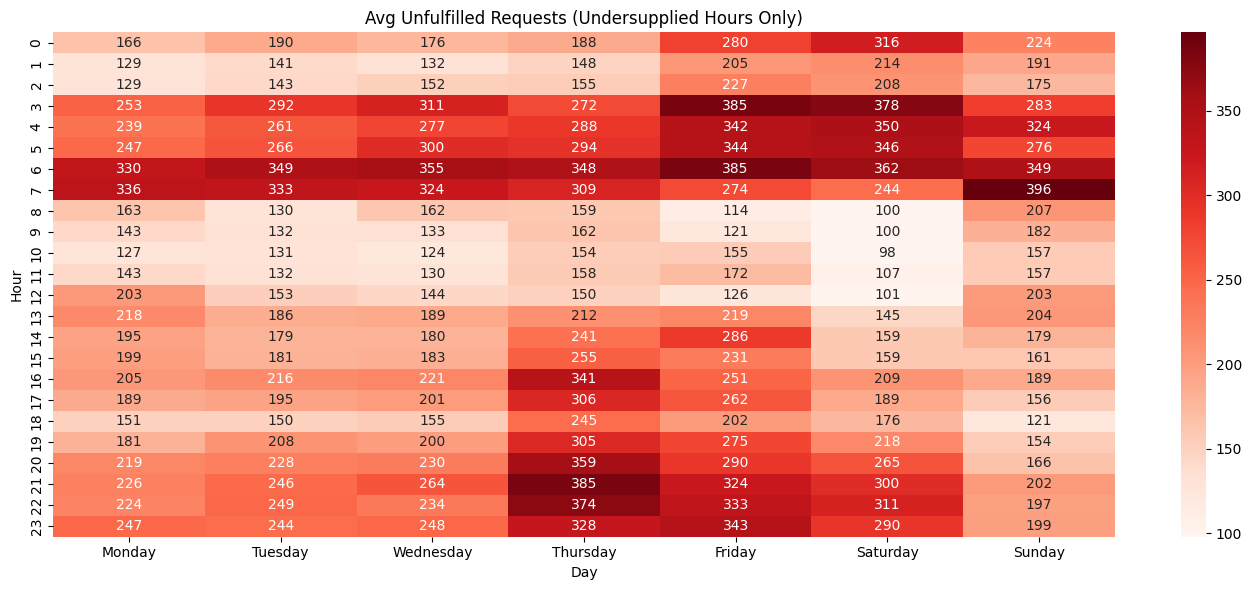

In [20]:

df['DayOfWeek'] = df['Date'].dt.day_name()

# undersupplied rows
df['Undersupplied'] = df['RidesRequests'] > df['TotalBoardedDrivers']

# Average unfulfilled requests for each hour and day (only when undersupplied)
heatmap_data = df[df['Undersupplied']].groupby(['Hour', 'DayOfWeek'])['Unfulfilled Requests'].mean().unstack().fillna(0)

# Arrange days in order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[days]

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='.0f')
plt.title('Avg Unfulfilled Requests (Undersupplied Hours Only)')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.tight_layout()
plt.show()


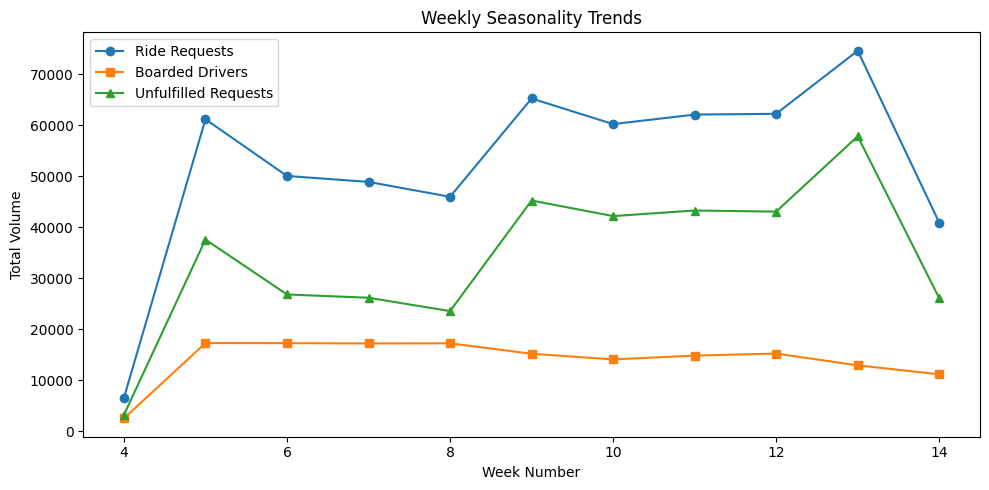

In [28]:

weekly_trend = df.groupby('week').agg({
    'RidesRequests': 'sum',
    'TotalBoardedDrivers': 'sum',
    'Unfulfilled Requests': 'sum'
}).reset_index()

plt.figure(figsize=(10, 5))
plt.plot(weekly_trend['week'], weekly_trend['RidesRequests'], label='Ride Requests', marker='o')
plt.plot(weekly_trend['week'], weekly_trend['TotalBoardedDrivers'], label='Boarded Drivers', marker='s')
plt.plot(weekly_trend['week'], weekly_trend['Unfulfilled Requests'], label='Unfulfilled Requests', marker='^')
plt.title('Weekly Seasonality Trends')
plt.xlabel('Week Number')
plt.ylabel('Total Volume')
plt.legend()
plt.tight_layout()
plt.show()
